# Exercises

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pickle
import numpy as np

 Best performance:
 C=0.30, Accuracy=0.9400


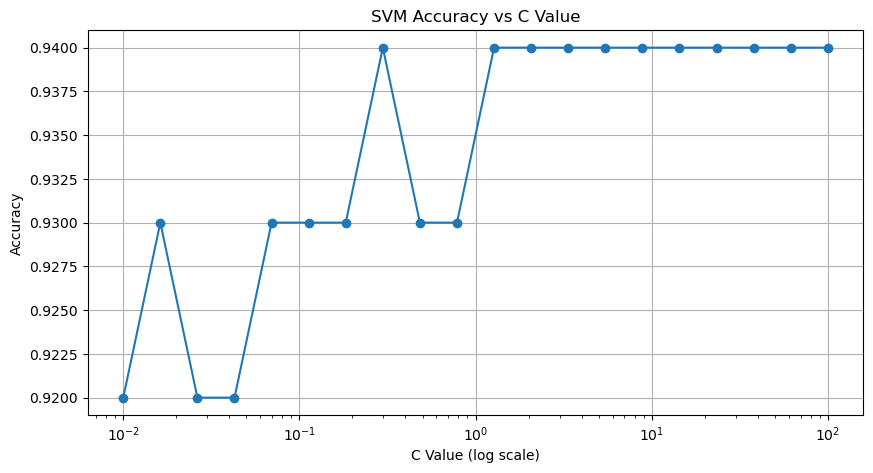

In [17]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=.8, random_state=42)

C_values = np.logspace(-2, 2, 20)
acc_linear = []

for C in C_values:
    svc_model = svm.SVC(kernel='linear', C=C)
    svc_model.fit(X, y)
    y_pred = svc_model.predict(X)
    acc = accuracy_score(y, y_pred)
    acc_linear.append(acc)

# Find the best C value 

C_best = C_values[np.argmax(acc_linear)]
print(f" Best performance:\n C={C_best:.2f}, Accuracy={np.max(acc_linear):.4f}")
# Plotting the results
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, acc_linear, marker='o')
plt.title('SVM Accuracy vs C Value')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.grid()


The best value for slack hyperparameter C is the smallest/strictest that guarentees maximum accuracy and it is C=0.30. That is because:
* Small C (e.g., 0.01) → too much regularisation → underfitting.
* Large C (e.g., 10–100) → very strict on margin violations → overfitting.

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


 Best performance:
 C=0.78, Accuracy=0.9500


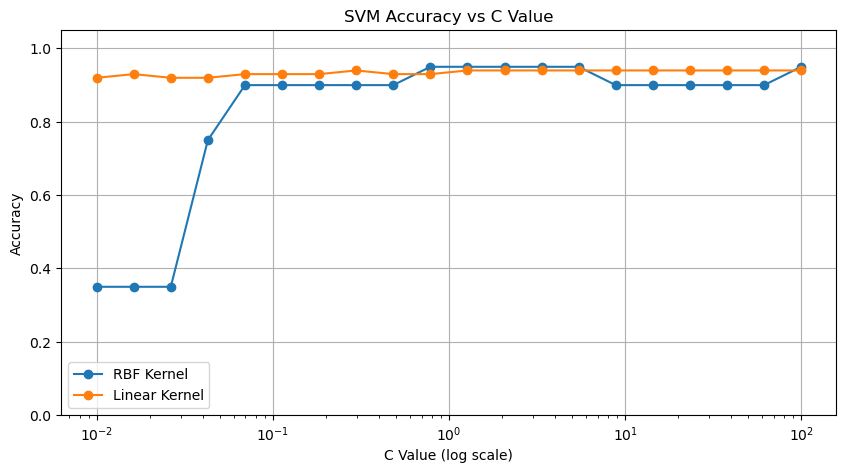

In [22]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = np.logspace(-2, 2, 20)
acc_nonl = []

for C in C_values:
    svc_model = svm.SVC(kernel='rbf', C=C)
    svc_model.fit(X_train, y_train)
    y_pred = svc_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_nonl.append(acc)

# Find the best C value 

C_best = C_values[np.argmax(acc_nonl)]
best_acc = np.max(acc_nonl)
print(f" Best performance:\n C={C_best:.2f}, Accuracy={best_acc:.4f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, acc_nonl, marker='o', label='RBF Kernel')
plt.semilogx(C_values, acc_linear, marker='o', label='Linear Kernel')
plt.legend()
plt.ylim(0, 1.05)
plt.title('SVM Accuracy vs C Value')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.grid()


 Best performance:
 C=61.58, Accuracy=0.9500
 Best performance:
 C=2.07, Accuracy=0.9000


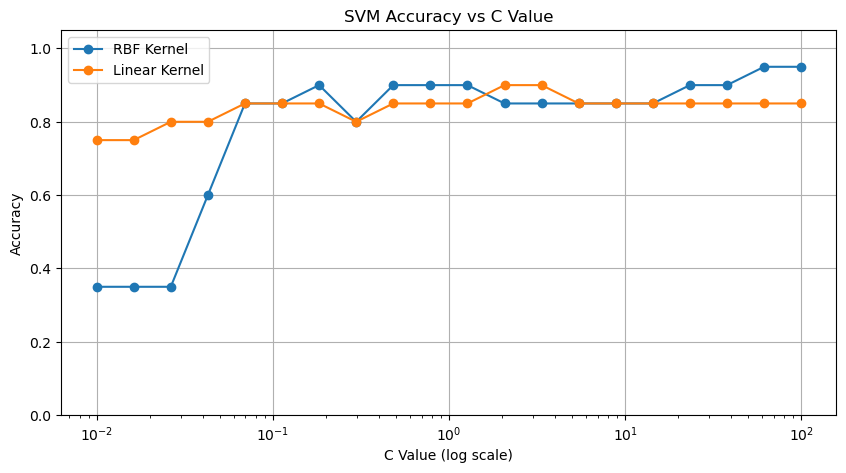

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=1.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = np.logspace(-2, 2, 20)
acc_nonl = []

acc_nonl = []
acc_linear = []

for C in C_values:
    # Nonlinear (RBF) kernel
    svc_model_rbf = svm.SVC(kernel='rbf', C=C)
    svc_model_rbf.fit(X_train, y_train)
    y_pred_rbf = svc_model_rbf.predict(X_test)
    acc_nonl.append(accuracy_score(y_test, y_pred_rbf))
    
    # Linear kernel
    svc_model_lin = svm.SVC(kernel='linear', C=C)
    svc_model_lin.fit(X_train, y_train)
    y_pred_lin = svc_model_lin.predict(X_test)
    acc_linear.append(accuracy_score(y_test, y_pred_lin))

# Find the best C value for nonlinear kernel
C_best = C_values[np.argmax(acc_nonl)]
best_acc = np.max(acc_nonl)
print(f" Best performance:\n C={C_best:.2f}, Accuracy={best_acc:.4f}")

# Print the best performance for linear kernel
C_best = C_values[np.argmax(acc_linear)]
best_acc = np.max(acc_linear)
print(f" Best performance:\n C={C_best:.2f}, Accuracy={best_acc:.4f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, acc_nonl, marker='o', label='RBF Kernel')
plt.semilogx(C_values, acc_linear, marker='o', label='Linear Kernel')
plt.legend()
plt.ylim(0, 1.05)
plt.title('SVM Accuracy vs C Value')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.grid()


The nonlinear kernel requires more slack to perform well (i.e. higher
C), since it needs more data flexibility to fit the curved boundary - but once it gets that, it catches up or surpasses the linear SVM. On the other hard, the linear kernel is consistently above 90% performance, even for small slack values, but also faces a ceiling that can be matched or surpassed by the nonlinear one after an increase in C.

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

In [71]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim * np.random.normal(0, 1, size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation), 2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [83]:
print("Baseline firing rates:\n", cell_rate_baseline)

Baseline firing rates:
 [ 4.73128802  1.05133844 19.76861363  3.0117779   1.56096554  2.40085102
  6.23693292  6.87588634  0.99645114  0.03578498  9.10247653  2.2777583
  2.47731629  4.58449177  1.52565104  3.89339534 10.94513536  3.02139643
 19.21521591  6.10265853]


In [73]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1. # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 # stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0, n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)
# print(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval), 1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson((cell_rate_baseline[cell]/s_rate) + noise_rate, size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        modulated_rate = cell_rate_stim[stimulus][cell]
        spikes[stim_idxs] = np.random.poisson(modulated_rate/s_rate, size=stim_idxs.shape)

    spike_times.append(time[spikes>0])

# a list of arrays, each array contains the spike times for a cell
# print(spike_times)


In [74]:
X = np.zeros((n_stim, n_cells))  # spike counts: [trial × cell]

# Loop over trials and cells to count spikes
for trial, t_onset in enumerate(stim_onsets):
    t_start = t_onset
    t_end = t_onset + stim_dur # end time of the trial window
    
    for cell in range(n_cells):
        # Get spike times for this cell
        spikes = spike_times[cell]
        
        # Count how many spikes fall within this trial window
        spike_count = np.sum((spikes >= t_start) & (spikes < t_end))
        
        # Fill X matrix
        X[trial, cell] = spike_count


In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X: [n_trials x n_cells], y: stimulus identity (stim_type)
X_train, X_test, y_train, y_test = train_test_split(X, stim_type, test_size=0.2, random_state=42)

# Create and train the decoder
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Decoding accuracy: {acc:.3f}")


Decoding accuracy: 1.000


In [80]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)  # for reproducibility

# simulate spiking activity
noise_rates = [0.1, 1.0, 5.0, 10., 20., 50.]  # different noise rates to test
sigma_stim = 0.5
acc1 = []
std_devs1 = []

for noise_rate in noise_rates:
    modulation = sigma_stim * np.random.normal(0, 1, size=n_cells)
    cell_rate_stim = {
    1: cell_rate_baseline * (1 + modulation),
    2: cell_rate_baseline * (1 - modulation)
    }
    cell_rate_stim[1][cell_rate_stim[1] < 0] = 0
    cell_rate_stim[2][cell_rate_stim[2] < 0] = 0
    
    spike_times = []

    for cell in range(n_cells):
        # Baseline + noise
        spikes = np.random.poisson((cell_rate_baseline[cell] + noise_rate) / s_rate, size=time.shape)
        
        for i, stimulus in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i] * s_rate, (stim_onsets[i] + stim_dur) * s_rate)
            spikes[stim_idxs] += np.random.poisson(cell_rate_stim[stimulus][cell] / s_rate, size=stim_idxs.shape)

        spike_times.append(time[spikes > 0])

    X = np.zeros((n_stim, n_cells))  # spike counts: [trial × cell]
    for trial, t_onset in enumerate(stim_onsets):
        t_start = t_onset
        t_end = t_onset + stim_dur
        
        for cell in range(n_cells):
            spikes = spike_times[cell]
            spike_count = np.sum((spikes >= t_start) & (spikes < t_end))
            X[trial, cell] = spike_count

    clf = SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, X, stim_type, cv=5)  # 5-fold cross-validation
    acc = np.mean(scores)
    std = np.std(scores)
    acc1.append(acc)
    std_devs1.append(std)
    print(f"Noise rate {noise_rate}: Decoding accuracy = {acc:.3f} ± {std:.3f}")


Noise rate 0.1: Decoding accuracy = 1.000 ± 0.000
Noise rate 1.0: Decoding accuracy = 1.000 ± 0.000
Noise rate 5.0: Decoding accuracy = 1.000 ± 0.000
Noise rate 10.0: Decoding accuracy = 1.000 ± 0.000
Noise rate 20.0: Decoding accuracy = 1.000 ± 0.000
Noise rate 50.0: Decoding accuracy = 1.000 ± 0.000


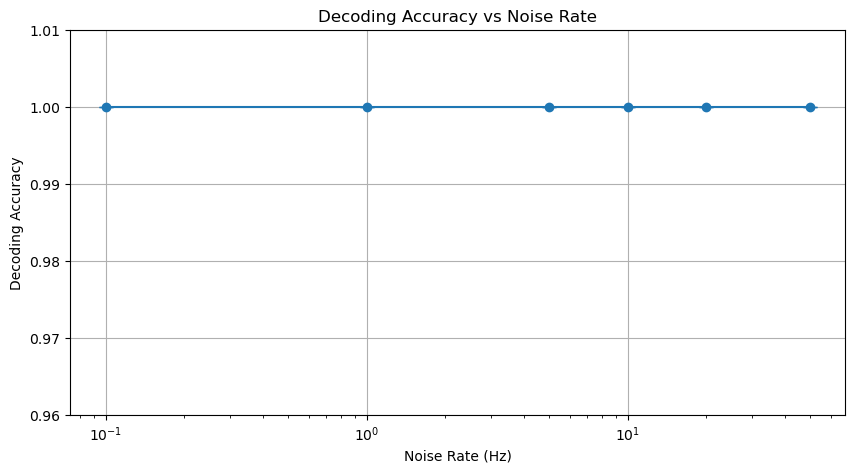

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.errorbar(noise_rates, acc1, yerr=std_devs1, fmt='o-', capsize=5)
plt.xscale('log')
plt.ylim(0.96, 1.01)
plt.xlabel('Noise Rate (Hz)')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy vs Noise Rate')
plt.grid()
plt.show()


In [99]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)  # for reproducibility

# simulate spiking activity
noise_rates = [0.1, 1.0, 5.0, 10., 20., 50.]  # different noise rates to test
sigma_stim = 0.3
acc1 = []
std_devs1 = []

for noise_rate in noise_rates:
    modulation = sigma_stim * np.random.normal(0, 1, size=n_cells)
    cell_rate_stim = {
    1: cell_rate_baseline * (1 + modulation),
    2: cell_rate_baseline * (1 - modulation)
    }
    cell_rate_stim[1][cell_rate_stim[1] < 0] = 0
    cell_rate_stim[2][cell_rate_stim[2] < 0] = 0
    
    spike_times = []

    for cell in range(n_cells):
        # Baseline + noise
        spikes = np.random.poisson((cell_rate_baseline[cell] + noise_rate) / s_rate, size=time.shape)
        
        for i, stimulus in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i] * s_rate, (stim_onsets[i] + stim_dur) * s_rate)
            spikes[stim_idxs] += np.random.poisson(cell_rate_stim[stimulus][cell] / s_rate, size=stim_idxs.shape)

        spike_times.append(time[spikes > 0])

    X = np.zeros((n_stim, n_cells))  # spike counts: [trial × cell]
    for trial, t_onset in enumerate(stim_onsets):
        t_start = t_onset
        t_end = t_onset + stim_dur
        
        for cell in range(n_cells):
            spikes = spike_times[cell]
            spike_count = np.sum((spikes >= t_start) & (spikes < t_end))
            X[trial, cell] = spike_count

    clf = SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, X, stim_type, cv=5)  # 5-fold cross-validation
    acc = np.mean(scores)
    std = np.std(scores)
    acc1.append(acc)
    std_devs1.append(std)

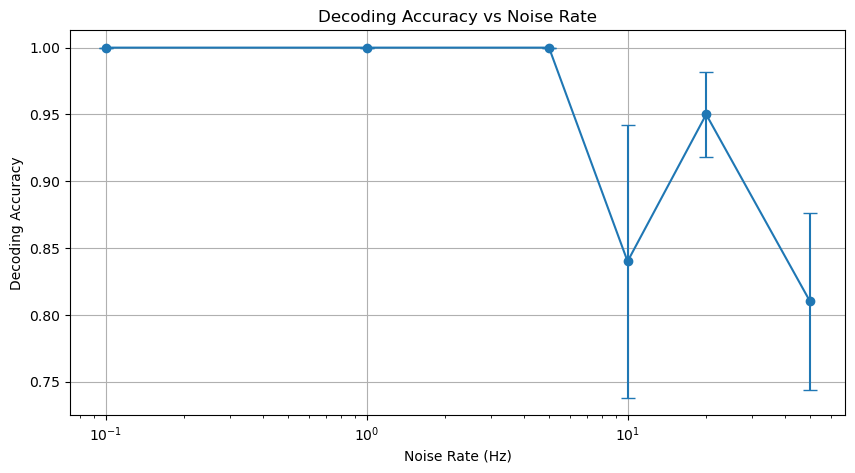

In [100]:
plt.figure(figsize=(10, 5))
plt.errorbar(noise_rates, acc1, yerr=std_devs1, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Noise Rate (Hz)')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy vs Noise Rate')
plt.grid()
plt.show()

Despite increasing the background noise level, the decoding accuracy remains at 1.0 across all noise conditions. This indicates that the stimulus-related modulation is strong and consistent across the population of neurons, allowing the SVM decoder to perfectly separate the two stimulus classes. The large number of neurons and relatively high modulation amplitude ($\sigma_{sim} = 0.5$) likely contribute to the model’s robustness. The expected effect of noise can be observed after reducing the $\sigma_{sim}$ enabling to spot the decrease in decoding accuracy.

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Parameters
sigma_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
acc2 = []
std_devs2 = []

for sigma_stim in sigma_values:
    # Recompute modulated firing rates
    modulation = sigma_stim * np.random.normal(0, 1, size=n_cells)
    cell_rate_stim = {
        1: cell_rate_baseline * (1 + modulation),
        2: cell_rate_baseline * (1 - modulation)
    }
    cell_rate_stim[1][cell_rate_stim[1] < 0] = 0
    cell_rate_stim[2][cell_rate_stim[2] < 0] = 0

    # Simulate spiking
    spike_times = []
    for cell in range(n_cells):
        spikes = np.random.poisson((cell_rate_baseline[cell] + noise_rate) / s_rate, size=time.shape)
        
        for i, stimulus in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i] * s_rate, (stim_onsets[i] + stim_dur) * s_rate)
            spikes[stim_idxs] += np.random.poisson(cell_rate_stim[stimulus][cell] / s_rate, size=stim_idxs.shape)

        spike_times.append(time[spikes > 0])

    # Count spikes during stimulus → build X matrix
    X = np.zeros((n_stim, n_cells))
    for trial, t_onset in enumerate(stim_onsets):
        t_start = t_onset
        t_end = t_onset + stim_dur
        for cell in range(n_cells):
            spikes = spike_times[cell]
            X[trial, cell] = np.sum((spikes >= t_start) & (spikes < t_end))

    # Decode using cross-validation
    clf = SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, X, stim_type, cv=5)
    acc = np.mean(scores)
    std = np.std(scores)
    
    acc2.append(acc)
    std_devs2.append(std)
    print(f"sigma_stim {sigma_stim:.2f}: Accuracy = {acc:.3f} ± {std:.3f}")


sigma_stim 0.01: Accuracy = 0.530 ± 0.117
sigma_stim 0.05: Accuracy = 0.530 ± 0.087
sigma_stim 0.10: Accuracy = 0.670 ± 0.051
sigma_stim 0.20: Accuracy = 0.750 ± 0.145
sigma_stim 0.30: Accuracy = 0.960 ± 0.037
sigma_stim 0.40: Accuracy = 0.930 ± 0.051
sigma_stim 0.50: Accuracy = 1.000 ± 0.000
sigma_stim 1.00: Accuracy = 1.000 ± 0.000


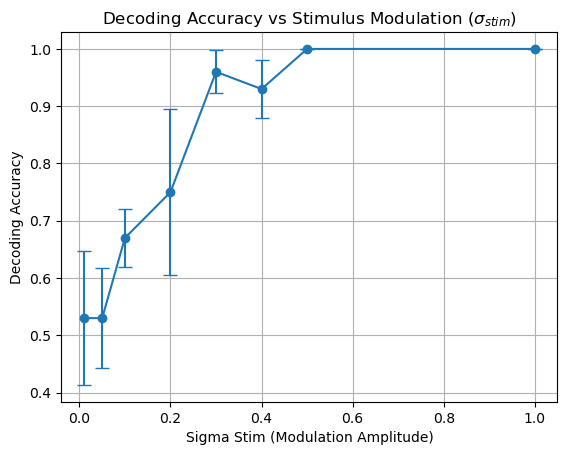

In [95]:
plt.errorbar(sigma_values, acc2, yerr=std_devs2, fmt='o-', capsize=5)
plt.xlabel('Sigma Stim (Modulation Amplitude)')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy vs Stimulus Modulation ($σ_{stim}$)')
plt.grid(True)
plt.show()


As the stimulus modulation amplitude increases, decoding accuracy improves signicantly.  For very low values (e.g., 0.01–0.2), decoding performance is near chance or moderately above it, with high variability across folds. This suggests that the neural responses to different stimuli are only weakly distinguishable. However, as $\sigma_{sim}$ increases beyond 0.5, the decoder achieves near-perfect accuracy, indicating that the population firing patterns for the two stimuli become highly separable. 

This backs up the observation and high accuracy for different noises from before. As we can see for $\sigma_{sim} = 0.5 $ accuracy is already 1.0 with 0 standard deviation. 

In [101]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Parameters
cell_counts = [1, 2, 5, 10, 15, 20]  # different numbers of neurons
sigma_stim = 0.5
noise_rate = 1.0

acc3 = []
std_devs3 = []

for n_cells in cell_counts:
    # Regenerate baseline rates and modulation
    cell_rate_baseline = np.random.exponential(average_firing_rate, size=n_cells)
    modulation = sigma_stim * np.random.normal(0, 1, size=n_cells)
    
    cell_rate_stim = {
        1: cell_rate_baseline * (1 + modulation),
        2: cell_rate_baseline * (1 - modulation)
    }
    cell_rate_stim[1][cell_rate_stim[1] < 0] = 0
    cell_rate_stim[2][cell_rate_stim[2] < 0] = 0

    # Simulate spiking
    spike_times = []
    for cell in range(n_cells):
        spikes = np.random.poisson((cell_rate_baseline[cell] + noise_rate) / s_rate, size=time.shape)
        for i, stim in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i] * s_rate, (stim_onsets[i] + stim_dur) * s_rate)
            spikes[stim_idxs] += np.random.poisson(cell_rate_stim[stim][cell] / s_rate, size=stim_idxs.shape)
        spike_times.append(time[spikes > 0])

    # Count spikes per trial → X matrix
    X = np.zeros((n_stim, n_cells))
    for trial, t_onset in enumerate(stim_onsets):
        t_start = t_onset
        t_end = t_onset + stim_dur
        for cell in range(n_cells):
            spikes = spike_times[cell]
            X[trial, cell] = np.sum((spikes >= t_start) & (spikes < t_end))

    # Decode
    clf = SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, X, stim_type, cv=5)
    acc3.append(np.mean(scores))
    std_devs3.append(np.std(scores))
    print(f"n_cells = {n_cells}: accuracy = {np.mean(scores):.3f} ± {np.std(scores):.3f}")


n_cells = 1: accuracy = 0.630 ± 0.081
n_cells = 2: accuracy = 0.660 ± 0.097
n_cells = 5: accuracy = 0.960 ± 0.058
n_cells = 10: accuracy = 0.970 ± 0.040
n_cells = 15: accuracy = 1.000 ± 0.000
n_cells = 20: accuracy = 1.000 ± 0.000


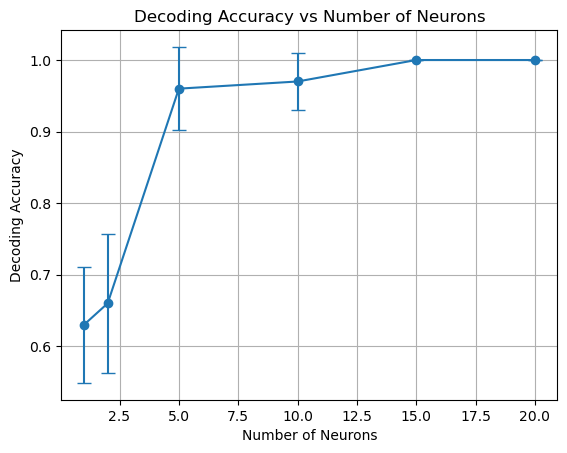

In [103]:
plt.errorbar(cell_counts, acc3, yerr=std_devs3, fmt='o-', capsize=5)
plt.xlabel('Number of Neurons')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy vs Number of Neurons')
plt.grid(True)
plt.show()


As the number of neurons increases, decoding accuracy improves rapidly. With very few neurons (1–2), performance is modest and variable, but adding just a few more neurons (around 5) dramatically boosts accuracy. Beyond 10 neurons, the decoder achieves near-perfect performance with minimal variability. This shows that population-level patterns become more distinct and resistant to noise.